Predicting whether a person is obese based on their BMI and body fat percentage

1 if BMI and fat% are high 

0 otherwise

Input 2features -BMI and Body fat%

Hidden Layer Dense layer with ReLu activation

Output Layer Dense layer with Sigmoid activation

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt


In [2]:
np.random.seed(42)
n_samples = 500
BMI = np.random.normal(25,5,n_samples)
body_fat = np.random.normal(20,7,n_samples)

In [3]:
BMI

array([27.48357077, 24.30867849, 28.23844269, 32.61514928, 23.82923313,
       23.82931522, 32.89606408, 28.83717365, 22.65262807, 27.71280022,
       22.68291154, 22.67135123, 26.20981136, 15.43359878, 16.37541084,
       22.18856235, 19.9358444 , 26.57123666, 20.45987962, 17.93848149,
       32.32824384, 23.8711185 , 25.33764102, 17.87625907, 22.27808638,
       25.55461295, 19.24503211, 26.87849009, 21.99680655, 23.54153125,
       21.99146694, 34.26139092, 24.93251388, 19.71144536, 29.11272456,
       18.89578175, 26.04431798, 15.20164938, 18.35906976, 25.98430618,
       28.6923329 , 25.85684141, 24.42175859, 23.49448152, 17.60739005,
       21.40077896, 22.69680615, 30.28561113, 26.71809145, 16.18479922,
       26.62041985, 23.0745886 , 21.61539   , 28.05838144, 30.15499761,
       29.6564006 , 20.80391238, 23.45393812, 26.65631716, 29.87772564,
       22.60412881, 24.07170512, 19.46832513, 19.01896688, 29.06262911,
       31.78120014, 24.63994939, 30.01766449, 26.80818013, 21.77

In [11]:
# Creating Target values
labels = ((BMI > 28)&(body_fat>25)).astype(int)

In [12]:
# Combine features and targets
X = np.column_stack((BMI,body_fat))
y = labels

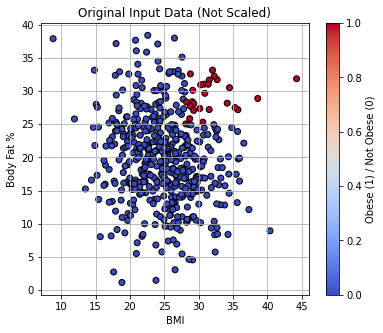

In [23]:
plt.figure(figsize=(6,5))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm', edgecolors='k')
plt.xlabel("BMI")
plt.ylabel("Body Fat %")
plt.title("Original Input Data (Not Scaled)")
plt.grid(True)
plt.colorbar(label="Obese (1) / Not Obese (0)")
plt.show()


In [14]:
# Split Data into Train and Tests
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=1)

In [15]:
# Normalize the Data
scaler = StandardScaler()
X_train_scaled= scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [16]:
# Define Neural Netwoek Model
model = Sequential([
    Dense(8,activation ='relu',input_shape=(2,)),
    Dense(1,activation = 'sigmoid')
])

In [17]:
# Compile the Model
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
# Train the model
history = model.fit(X_train_scaled,y_train,epochs=50,validation_split=0.2,verbose=1)

Epoch 1/50
10/10 [==============================] - 2s 29ms/step - loss: 0.7221 - accuracy: 0.4625 - val_loss: 0.6908 - val_accuracy: 0.6625
Epoch 2/50
10/10 [==============================] - 0s 7ms/step - loss: 0.7002 - accuracy: 0.5562 - val_loss: 0.6723 - val_accuracy: 0.7000
Epoch 3/50
10/10 [==============================] - 0s 7ms/step - loss: 0.6788 - accuracy: 0.6250 - val_loss: 0.6544 - val_accuracy: 0.7375
Epoch 4/50
10/10 [==============================] - 0s 6ms/step - loss: 0.6581 - accuracy: 0.6812 - val_loss: 0.6371 - val_accuracy: 0.7375
Epoch 5/50
10/10 [==============================] - 0s 11ms/step - loss: 0.6381 - accuracy: 0.7344 - val_loss: 0.6202 - val_accuracy: 0.7625
Epoch 6/50
10/10 [==============================] - 0s 9ms/step - loss: 0.6186 - accuracy: 0.8031 - val_loss: 0.6038 - val_accuracy: 0.8375
Epoch 7/50
10/10 [==============================] - 0s 6ms/step - loss: 0.5997 - accuracy: 0.8813 - val_loss: 0.5877 - val_accuracy: 0.8375
Epoch 8/50
10/10 [

In [21]:
loss,accuracy = model.evaluate(X_test_scaled,y_test)
print(f"\nTest accuracy = {accuracy*100:.2f}%")

4/4 [==============================] - 0s 3ms/step - loss: 0.0553 - accuracy: 0.9700

Test accuracy = 97.00%


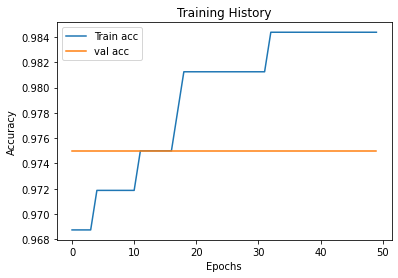

In [22]:
# Plotting Accuracy over epochs
plt.plot(history.history['accuracy'],label = 'Train acc')
plt.plot(history.history['val_accuracy'],label = 'val acc')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title("Training History")
plt.show()